In [3]:
pwd

'd:\\Hack\\Hackathon'

In [4]:
cd  models/research

d:\Hack\Hackathon\models\research


In [5]:
pwd

'd:\\Hack\\Hackathon\\models\\research'

In [5]:
!python -m pip install .

Processing d:\hack\hackathon\models\research

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\vijaygarg01\Anaconda3\python.exe' 'C:\Users\vijaygarg01\Anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\VIJAYG~1\AppData\Local\Temp\tmpinkgsmvv'
       cwd: C:\Users\vijaygarg01\AppData\Local\Temp\pip-install-_dpz3hb_\pycocotools_6e256fe6ade245c58d3a04a9fba9cf88
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\vijaygarg01\AppData\Local\Tem


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697022 sha256=17ba8044f07c0777cdb68ce3177dd28655215937d17d23aa70b6d7831c686f73
  Stored in directory: C:\Users\vijaygarg01\AppData\Local\Temp\pip-ephem-wheel-cache-tb5h5md4\wheels\ca\7b\89\3cce7ade85f219712d4074c5f52fc11bdcc15a233cdec138b6
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=7f253d6db6eaf60b3fa9c2d7037c5daa20f44994ccf24c718697b8e1e2f95f9f
  Stored in directory: c:\users\vijaygarg01\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
  Created wheel for crcmod: filename=crcmod-1.7-py3-none-any.whl size=

You should consider upgrading via the 'C:\Users\vijaygarg01\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
import time
from models.research.object_detection.utils import label_map_util
from models.research.object_detection.utils import visualization_utils as viz_utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [8]:
pwd

'd:\\Hack\\Hackathon\\models\\research'

In [10]:
cd ../..

d:\Hack\Hackathon


In [11]:
pwd

'd:\\Hack\\Hackathon'

In [13]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

# from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = './training/images/upload/glass124.jpg'
# IMAGE_PATHS = './content/training_demo/images/upload/paper593.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = 'D:\Hack\Hackathon\\training\exported_models\my_model'
# PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = 'D:\Hack\Hackathon\\training\\annotations\label_map.pbtxt'
# PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.6)

# LOAD THE MODEL



PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)



def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=MIN_CONF_THRESH,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED
# white paper 

Loading model...Done! Took 126.92426347732544 seconds
Running inference for ./training/images/upload/glass124.jpg... Done


NameError: name 'cv2_imshow' is not defined

In [37]:
cv2.imshow("abc",image_with_detections)

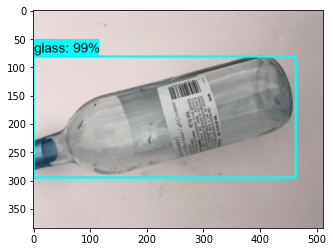

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_with_detections)
plt.show()